In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
file_list = ["S01R01", "S01R02", "S02R01", "S02R02", "S03R01", "S05R01", "S05R02", "S06R01", "S07R01", "S08R01", "S09R01"]

In [ ]:
def calcAccuracy(Ypred, Ytrue):
    return (np.count_nonzero(Ypred == Ytrue)) / len(Ytrue)

S01R01 acc: 0.9117488595955605
S01R02 acc: 0.9125101261428076
S02R01 acc: 0.880093737794558
S02R02 acc: 0.8593052491148854
S03R01 acc: 0.8276178250504309
S05R01 acc: 0.7929153974648717
S05R02 acc: 0.7945593366031248
S06R01 acc: 0.9177542858914344
S07R01 acc: 0.9157275625196426
S08R01 acc: 0.7296767212227783
S09R01 acc: 0.8897336126908111


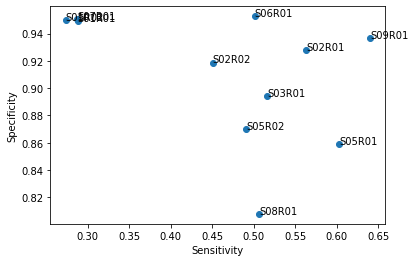

In [ ]:
spec = []
sens = []


for file_name in file_list:
  data = pd.read_csv('gdrive/My Drive/Esame bellotti/dataset/'+file_name+'.txt')
  s = data['N'] != 0
  tmp = data.loc[s]
  tmp.sample(10000)
  X_train, X_test, y_train, y_test = train_test_split(tmp[["A0", "A1", "A2", "U0", "U1", "U2", "T1", "T2", "T3"]], tmp.N, test_size=0.3, random_state =109) # 70% training and 30% test

  scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
  X_train = scaling.transform(X_train)
  X_test = scaling.transform(X_test)


  clf = tree.DecisionTreeClassifier(max_depth=100)
  clf = clf.fit(X_train, y_train)

  Y_pred = clf.predict(X_test)

  tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()
  sp = tn/(tn+fp)
  se = tp/(tp+fn)
  acc = accuracy_score(y_test, Y_pred)

  spec.append(sp)
  sens.append(se)

  print(file_name + " acc: " + str(acc))


fig, ax = plt.subplots()

ax.scatter(sens, spec)
ax.set_xlabel('Sensitivity')
ax.set_ylabel('Specificity')

for i, txt in enumerate(file_list):
  ax.annotate(txt, (sens[i], spec[i]))


In [ ]:
X_tr_s = []
Y_tr_s = []
for file_name in file_list:
  df = pd.read_csv('gdrive/My Drive/Esame bellotti/dataset/'+file_name+'.txt')
  s = df['N'] != 0
  tmp = df.loc[s]

  n_row = tmp.shape[0]
  up = round(n_row * 0.7)
  down = n_row - up
  
  X_train, X_test, y_train, y_test = train_test_split(tmp[["A0", "A1", "A2", "U0", "U1", "U2", "T1", "T2", "T3"]], tmp.N, test_size=0.3) # 70% training and 30% test

  X_tr_s.append(X_train)
  Y_tr_s.append(y_train)

X_tr = pd.concat(X_tr_s, axis=0, ignore_index=True)
Y_tr = pd.concat(Y_tr_s, axis=0, ignore_index=True)

#Training
clf = tree.DecisionTreeClassifier(max_depth=100)
clf = clf.fit(X_tr, Y_tr)

for file_name in file_list:
  df = pd.read_csv('gdrive/My Drive/Esame bellotti/dataset/'+file_name+'.txt')
  s = df['N'] != 0
  tmp = df.loc[s]

  X_train, X_test, y_train, y_test = train_test_split(tmp[["A0", "A1", "A2", "U0", "U1", "U2", "T1", "T2", "T3"]], tmp.N, test_size=0.3) # 70% training and 30% test

  Y_pred = clf.predict(X_test)
  acc = calcAccuracy(Y_pred, y_test)
  print(file_name + " acc: " + str(acc))

  

S01R01 acc: 0.9649437879386517
S01R02 acc: 0.9656289781275316
S02R01 acc: 0.9544330165343055
S02R02 acc: 0.9502796449279081
S03R01 acc: 0.947625160462131
S05R01 acc: 0.9290557138645966
S05R02 acc: 0.9363907569398796
S06R01 acc: 0.9705800291409616
S07R01 acc: 0.9672697885332017
S08R01 acc: 0.9134316245096713
S09R01 acc: 0.9627057767135588
